# Homework 2





---

# Linear Regression


In section $\S 1$ we consider **simple** linear regression ("simple" means that the input variable is **one-dimensional**). We will create a custom linear regression model using batch gradient descent. 

In section $\S2$ we will use ```sklearn LinearRegression``` class. First, we will consider simple linear regression (input variable is one-dimensional), and afterwards, we will consider **multiple** linear regression (input variable is **multi-dimensional**). 

In section $\S3$ we will implement Polynomial Regression using ```sklearn```. 

---

---

## 1) Custom Simple Linear Regression Code -- Single Neuron Model with Gradient Descent

Consider dataset $D = \{ (x^{(1)}, y^{(1)}), \ldots, (x^{(n)}, y^{(n)})\}$ where $x^{(i)}, y^{(i)} \in \mathbb R$.

Simple linear regression model is given by $h(x) = wx + b$.

We want to find parameters $w$ and $b$ that minimize the mean sqaured error loss function:

$$
L(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

where $\hat{y}^{(i)} = h(x^{(i)}) = w x^{(i)}+b$ and $D$ is the data set.  

Since $L(w, b; D)$ is a differentiable function of both $w$ and $b$, we can try to solve this minimization problem by applying the gradient descent algorithm:

$$
w_{new} = w - \alpha \frac{\partial L}{\partial w}(w, b; D)
$$

$$
b_{new} = b - \alpha \frac{\partial L}{\partial b}(w, b; D)
$$

where $\alpha$ is the learning rate hyperparameter and the derivaties are given by 

$$
\frac{\partial L}{\partial w}(w, b; D) = \frac{2}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}
$$

$$
\frac{\partial L}{\partial b}(w, b; D) = \frac{2}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)
$$

---

---

We will consider setosa flowers in the iris data set and we'll use linear regression to predict "sepal width" as a linear function of "sepal length".

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df = df.iloc[:50][["sepal_length", "sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
df.shape

(50, 2)

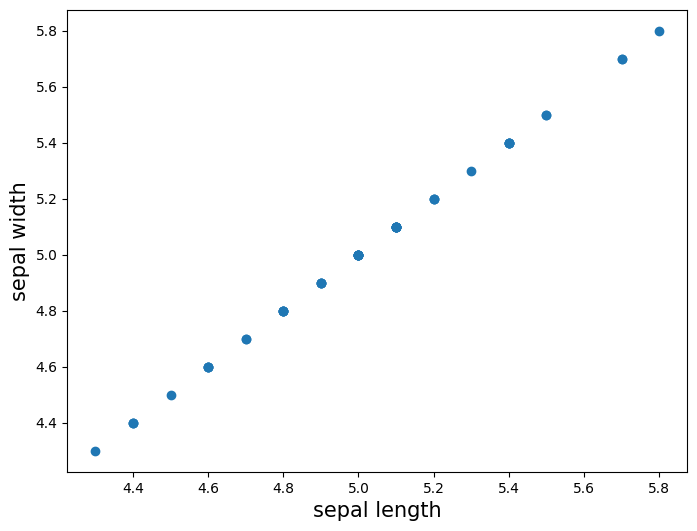

In [4]:
# We create the scatter plot

plt.figure(figsize = (8, 6))

plt.scatter(df['sepal_length'], df['sepal_length'])
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15);

In [5]:
# We compute covariance between the two variables

df.cov()

,sepal_length,sepal_width
sepal_length,0.124249,0.100298
sepal_width,0.100298,0.145180


In [6]:
# We cpompute the correlation between the two variables

df.corr()

,sepal_length,sepal_width
sepal_length,1.00000,0.74678
sepal_width,0.74678,1.00000


 # part 1 
## (a) Early Stopping Based on Loss Change
We observed that using 100 epochs was inefficient since after about epoch 55, the loss did not decrease significantly. To address this, we introduced an early stopping criterion where the training process halts if the change in loss is less than 1%. This optimization saves time by preventing unnecessary epochs when the loss stabilizes, resulting in earlier stopping.

## (b) Stochastic Gradient Descent (SGD) Implementation
The original class used batch gradient descent, which updates the parameters after processing the entire batch. To explore the behavior of stochastic gradient descent (SGD), we modified the class to allow switching between  **batch** and **stochastic** modes as modifed in Class MyLinReg **fit**method

When **mode = batch**, the weights and bias are **updated** after **computing the entire dataset**.
when **mode= stochastic**,weights and bias are updated with the same formula as batch ,except that **update** occur after **every individual datapoint** error calculation .

As we can observed below, By using **SGD**(Stochastic Gradient Descent) , we iterated over more steps and observed how the root mean square error (RMSE) evolves. The graph of RMSE for batch gradient descent is typically smooth and decreases consistently as the number of iterations increases. In contrast, the RMSE graph for stochastic gradient descent shows more fluctuations due to the more frequent updates, but on average, it still trends downward.

In [7]:
class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of batch gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10,mode = "batch")
        mode can choose between "batch" and "stochastic"

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 100 ,early_stop = 0, mode = "batch"): 
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        self.early_stop_threshold = early_stop 

        for _ in range(epochs):
            errors = 0
            if mode == "batch":    
                sum_1 = 0
                sum_2 = 0
                for xi, yi in zip(X, y):
                    sum_1 += (self.predict(xi) - yi)*xi
                    sum_2 += (self.predict(xi) - yi)
                    errors += ((self.predict(xi) - yi)**2)
                    
                self.theta[:-1] -= 2*alpha*sum_1/n  #udpate for weights based on whole batch
                self.theta[-1] -= 2*alpha*sum_2/n    # update bias of based on whole batch

            # Shuffle the data if using stochastic or mini-bath
            if mode == "stochastic":
                indices = np.random.permutation(n)
                X, y = X[indices], y[indices]
                
                for xi, yi in zip(X, y):
                    prediction_error = (self.predict(xi) - yi)
                    self.theta[:-1] -= 2 * alpha * prediction_error * xi   #udpate for weights  at every signle datapoint
                    self.theta[-1] -= 2 * alpha * prediction_error     # update bias at every single datapoint
                    errors += prediction_error ** 2
                    
                
            self.errors.append(errors/n)
            # check if early stop triggered, if error change smaller than 1%
            if len(self.errors ) > 1 :
                error_change = abs(self.errors[-2]- self.errors[-1] )/ self.errors[-2]
                if error_change < self.early_stop_threshold:
                    print(f"Early stopping at epoch {_ + 1} due to small error change: {error_change:.5f}")
                    break
                    

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [8]:
X = df[['sepal_length']].to_numpy()


In [9]:
X.shape

(50, 1)

In [10]:
y = df['sepal_width'].to_numpy()


In [11]:
def identity_function(z):
    return z

In [12]:
# We instantiate an instance of MyLinReg class with identity activation function

model = MyLinReg(identity_function)
model.fit(X, y)

In [13]:
model.predict(X)

array([3.46334726, 3.35502007, 3.24669289, 3.1925293 , 3.40918366,
       3.62583803, 3.1925293 , 3.40918366, 3.08420211, 3.35502007,
       3.62583803, 3.30085648, 3.30085648, 3.03003852, 3.8424924 ,
       3.78832881, 3.62583803, 3.46334726, 3.78832881, 3.46334726,
       3.62583803, 3.46334726, 3.1925293 , 3.46334726, 3.30085648,
       3.40918366, 3.40918366, 3.51751085, 3.51751085, 3.24669289,
       3.30085648, 3.62583803, 3.51751085, 3.68000163, 3.35502007,
       3.40918366, 3.68000163, 3.35502007, 3.08420211, 3.46334726,
       3.40918366, 3.1383657 , 3.08420211, 3.40918366, 3.46334726,
       3.30085648, 3.46334726, 3.1925293 , 3.57167444, 3.40918366])

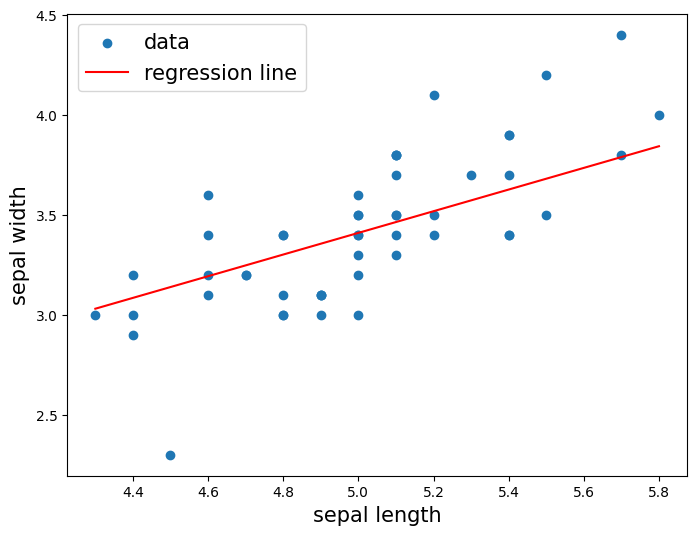

In [14]:
domain_x = np.linspace(np.min(X), np.max(X), 5)
domain_y = model.predict(domain_x.reshape(-1,1))

plt.figure(figsize = (8, 6))

plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15)
plt.legend(fontsize=15);

In [15]:
domain_x 

array([4.3  , 4.675, 5.05 , 5.425, 5.8  ])

In [16]:
domain_y

array([3.03003852, 3.23315199, 3.43626546, 3.63937893, 3.8424924 ])

In [17]:
domain_x.reshape(-1,1)

array([[4.3  ],
       [4.675],
       [5.05 ],
       [5.425],
       [5.8  ]])

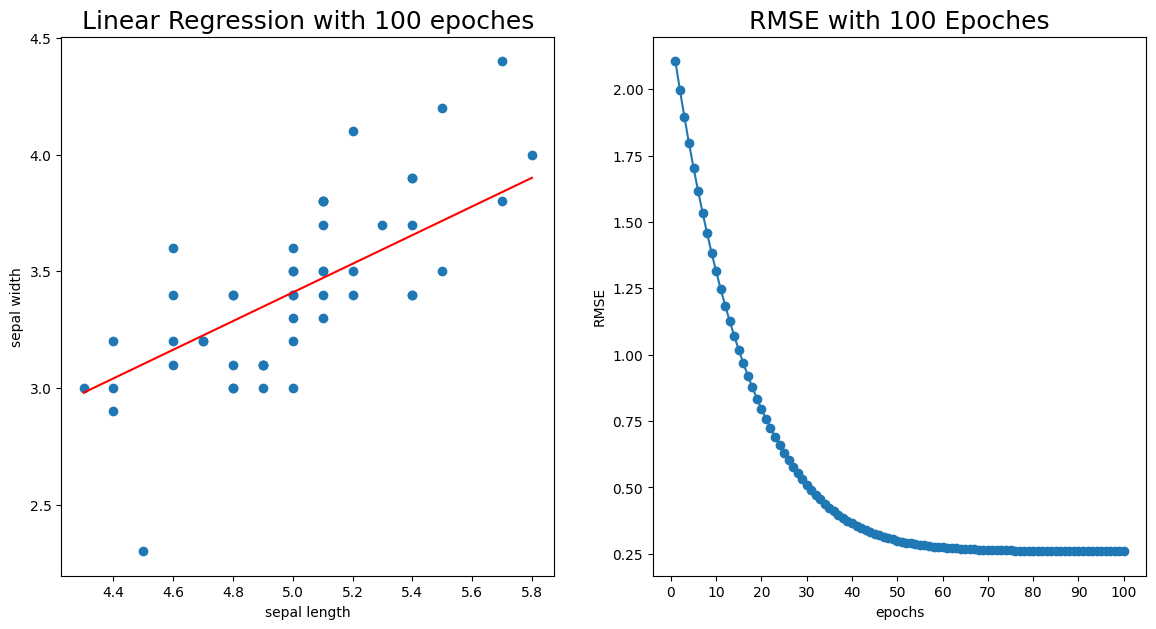

In [18]:
model = MyLinReg(identity_function)
model.fit(X, y, epochs = 100, alpha = 0.001)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression with 100 epoches", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE with 100 Epoches", fontsize = 18);

## Now  we use **early stop** when the error change is less than 1% by setting **early_stop = 0.01**

Early stopping at epoch 53 due to small error change: 0.00985


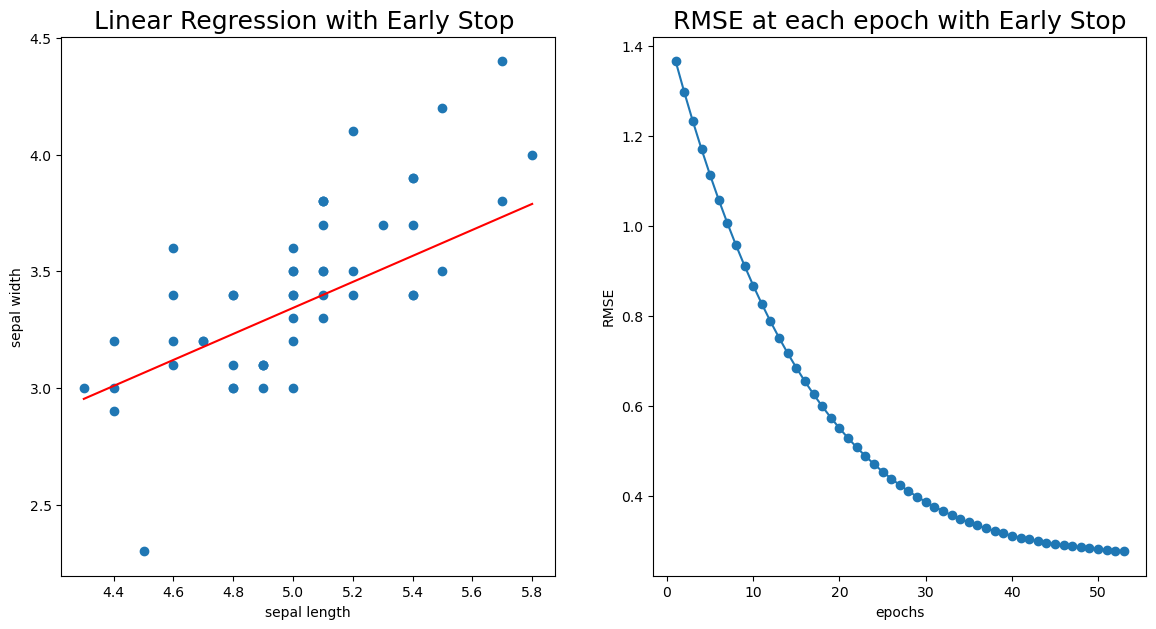

In [52]:
model = MyLinReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100,early_stop = 0.01) #set early stop = 0.01

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression with Early Stop ", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch with Early Stop", fontsize = 18);

**As we can observe it stops at around 53 epoches**


## Using SGD (stochastic gradient descent)
The class initially uses batch gradient descent to minimize the loss function. We modified the code to use stochastic gradient descent instead by using **mode = "stochastic"** and observed the behavior of RMSE iteration until the error change is smaller than 1%

Early stopping at epoch 6 due to small error change: 0.00390


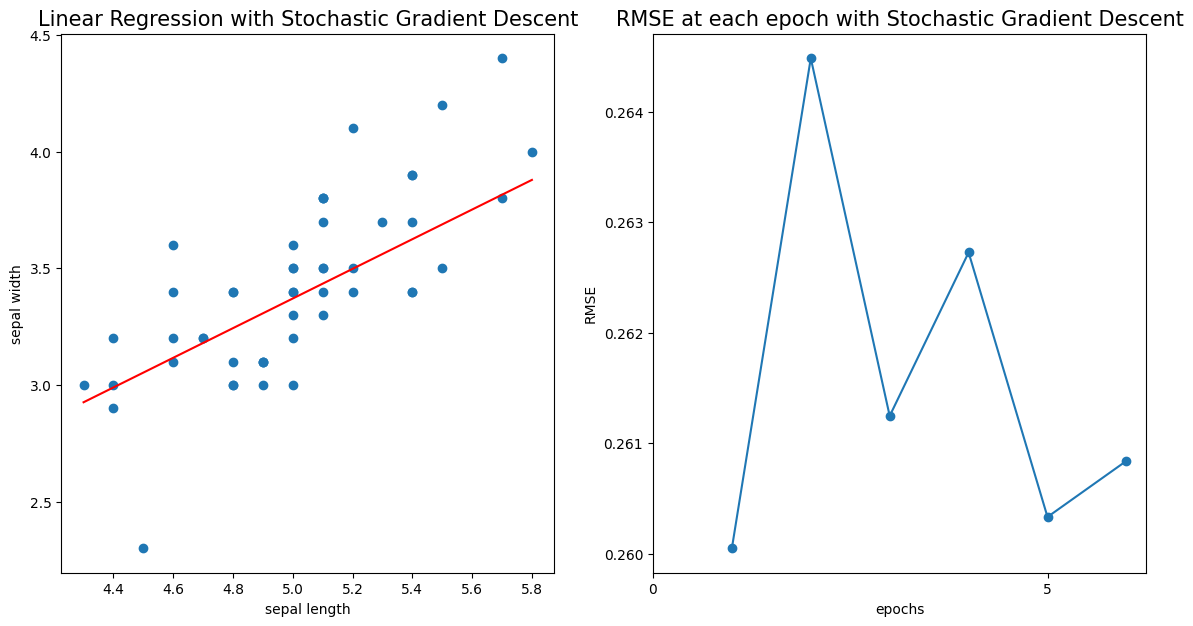

In [21]:
model = MyLinReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100,early_stop = 0.01,mode = "stochastic")

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression with Stochastic Gradient Descent", fontsize = 15)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 5))
ax2.set_title("RMSE at each epoch with Stochastic Gradient Descent", fontsize = 15);

**As observed above**, while the RMSE graph for batch gradient descent is smooth and steadily decreases with the number of iterations, the RMSE graph for **stochastic gradient descent** exhibits **more fluctuations** due to updates made after each individual data point. Despite these fluctuations, stochastic gradient descent generally **converges faster**. This is evident in the figure, where stochastic gradient descent achieves convergence in just 6 epochs, compared around 53 epochs for batch gradient descent.

## 2) Simple Linear Regression with Sklearn

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns

ads_data = pd.read_csv("advertising_dataset.csv") 

# https://www.kaggle.com/datasets/ashydv/advertising-dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

---

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple media channels like TV, radio, and newspapers. We want to understand the impact of ad budgets on the overall sales.

---

In [23]:
ads_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [24]:
ads_data = ads_data[["TV", "Radio", "Newspaper", "Sales"]]
ads_data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [25]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
ads_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


d:\anaconda\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


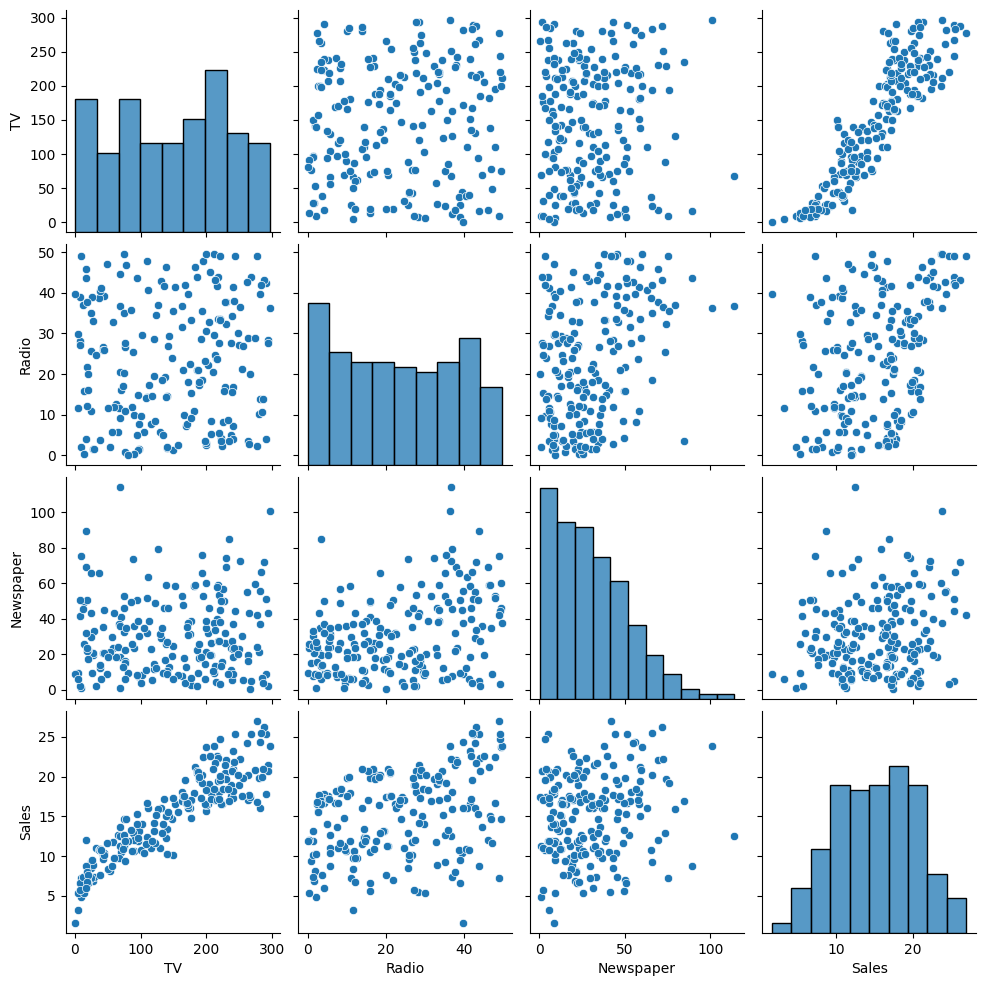

In [27]:
sns.pairplot(ads_data)

In [28]:
ads_data.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,408.828044
Radio,69.862492,220.427743,114.496979,27.428189
Newspaper,105.919452,114.496979,474.308326,18.177390
Sales,408.828044,27.428189,18.177390,27.919517


In [29]:
corr_matrix = np.round(ads_data.corr(), 2)
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


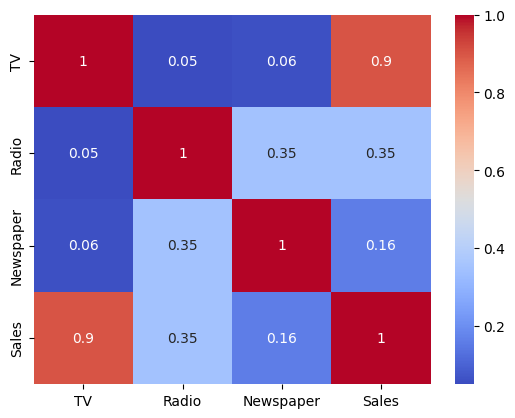

In [30]:
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm");

---

Based on the scatter plots as well as on the correlation coefficients, we choose to create a linear regression model to 
predict "sales" based on "TV".

---

____

# Part 2:
## Using **SGDRegressor** with **MinMaxScaler**

### Objectives:
1. **Apply SGDRegressor**: Replace **LinearRegression** with **SGDRegressor** to leverage stochastic gradient descent for faster convergence.
2. **Scale Features**: Use **MinMaxScaler** to scale **TV** and **Radio** features to a fixed range (e.g., 0 to 1). Feature scaling can improve the convergence rate of gradient descent-based algorithms.
3. **Train & Evaluate**: Compare the model's **RMSE** (Root Mean Squared Error) with and without feature scaling to assess the impact of scaling on performance for both **LinearRegression** and **SGDRegressor**.



## Multiple Linear Regression with Sklearn

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

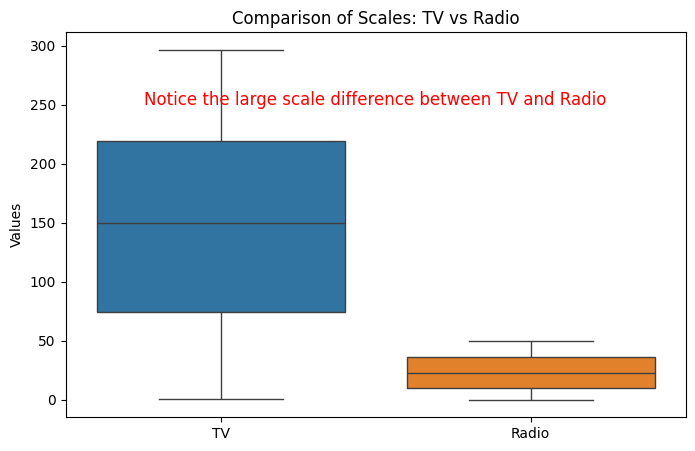

In [32]:
X = ads_data[['TV', 'Radio']]
y = ads_data['Sales']


# Create a boxplot to visualize the distribution of TV and Radio
plt.figure(figsize=(8, 5))
sns.boxplot(data=X)
plt.title('Comparison of Scales: TV vs Radio')
plt.text(0.5, 250, "Notice the large scale difference between TV and Radio", 
         fontsize=12, color='red', ha='center')
plt.ylabel('Values')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 **Scaled the features, It's important to apply the same scaling to train and test set**

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling to the test data 
X_test_scaled = scaler.transform(X_test)


### Training and evaluating  Linear Regression without scaling

In [35]:
reg = LinearRegression()

# Fit the model without scaling
reg.fit(X_train, y_train)

w = reg.coef_
b = reg.intercept_
print(f"The linear regression model based on the training data without scaling  is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3) } \n")
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")


The linear regression model based on the training data without scaling  is 

predicted_sales = 0.054 * TV + 0.107 * radio + 4.892 

RMSE on the training data: 1.6920011077061654

RMSE on the test data: 1.551826336889847


### Training  and evaluating Linear Regression with scaling

In [36]:
reg = LinearRegression()

# Fit the model without scaling
reg.fit(X_train_scaled, y_train)

w = reg.coef_
b = reg.intercept_
print(f"The linear regression model based on the training data with scaling  is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3) } \n")
mse_train = mean_squared_error(y_train, reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")


The linear regression model based on the training data with scaling  is 

predicted_sales = 15.852 * TV + 5.284 * radio + 4.93 

RMSE on the training data: 1.692001107706165

RMSE on the test data: 1.5518263368898475


---

For **Linear Regression**, scaling the input features has **minimal impact on performance**, as the **RMSE remains nearly identical** before and after scaling.

---


## Replace with SGDRegressor

In [37]:

from sklearn.linear_model import SGDRegressor

# Initialize the SGDRegressor model
reg = SGDRegressor()

# Fit the model to your training data
reg.fit(X_train, y_train)

w = reg.coef_
b = reg.intercept_
print(f"The SGD regression model based on the training data without scaling is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}\n")

mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"RMSE on the training data without scaling is : {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data without scaling is : {np.sqrt(mse_test)}")


The SGD regression model based on the training data without scaling is 

predicted_sales = -112995085633.755 * TV + -42703467546.633 * radio + [3.06897505e+10]

RMSE on the training data without scaling is : 20929358077887.066

RMSE on the test data without scaling is : 17987558743053.105


In [38]:

reg = SGDRegressor()

# Fit the model to your training data
reg.fit(X_train_scaled, y_train)

w = reg.coef_
b = reg.intercept_
print(f"The SGD regression model based on the scaling training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}\n")

mse_train = mean_squared_error(y_train, reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, reg.predict(X_test_scaled))

print(f"RMSE on the training data with scaling is : {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data with scaling is : {np.sqrt(mse_test)}")


The SGD regression model based on the scaling training data is 

predicted_sales = 14.552 * TV + 4.95 * radio + [5.824]

RMSE on the training data with scaling is : 1.7363884713981477

RMSE on the test data with scaling is : 1.6940172770737383


___
### Conclusion:
Feature scaling is crucial for **SGDRegressor**. Without scaling, the model produced a **Training RMSE o18997222744133.1111** and a **Test RMSE o16279592567455.94394**, indicating poor convergence. After scaling, the model's performance drastically improved, with a **Training RMSE of 1.7351** and a **Test RMSE of 1.6912**, highlighting the importance of balanced feature scales.
___





# Part 3: 

Import the data file ```mtcars.csv```. The goal is
to determine two or three continuous numerical variables that can be used to predict mpg
(miles per gallon) using multiple linear regression. You can use ```sklearn``` or custom class; batch GD, SGD, or mini-batch SGD; 
and scaling.  


In [132]:
mtcars_data = pd.read_csv("mtcars.csv") 

In [133]:
mtcars_data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2



### Identifying Continuous Variables
The following continuous variables were identified: **mpg**, **disp**, **hp**, **drat**, **wt**, and **qsec**.


In [134]:
# Select continuous numerical variables
mtcars_data = mtcars_data[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']]

mtcars_data.head()


,mpg,disp,hp,drat,wt,qsec
0,21.0,160.0,110,3.90,2.620,16.46
1,21.0,160.0,110,3.90,2.875,17.02
2,22.8,108.0,93,3.85,2.320,18.61
3,21.4,258.0,110,3.08,3.215,19.44
4,18.7,360.0,175,3.15,3.440,17.02


In [135]:
mtcars_data.describe()

,mpg,disp,hp,drat,wt,qsec
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,230.721875,146.687500,3.596563,3.217250,17.848750
std,6.026948,123.938694,68.562868,0.534679,0.978457,1.786943
min,10.400000,71.100000,52.000000,2.760000,1.513000,14.500000
25%,15.425000,120.825000,96.500000,3.080000,2.581250,16.892500
50%,19.200000,196.300000,123.000000,3.695000,3.325000,17.710000
75%,22.800000,326.000000,180.000000,3.920000,3.610000,18.900000
max,33.900000,472.000000,335.000000,4.930000,5.424000,22.900000


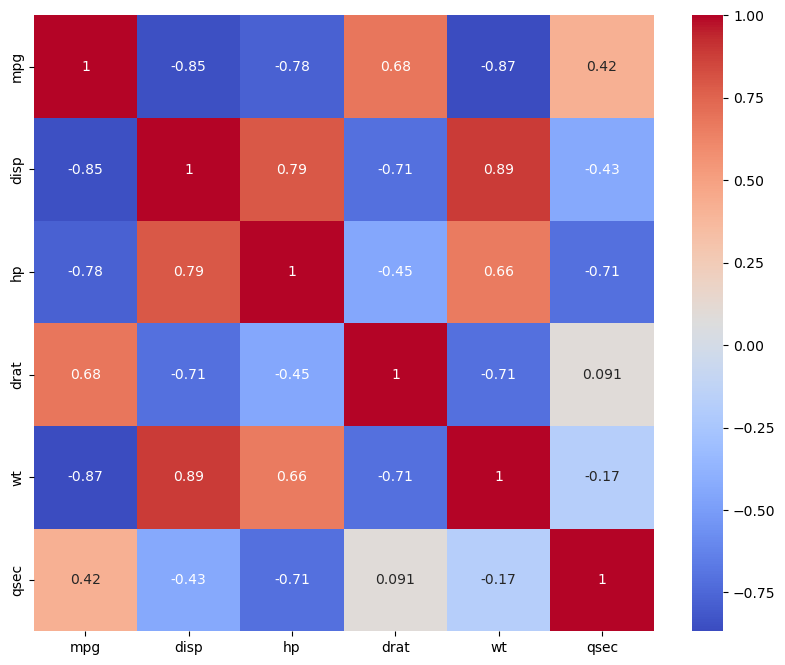

In [138]:

# Calculate the correlation matrix
corr_matrix = mtcars_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


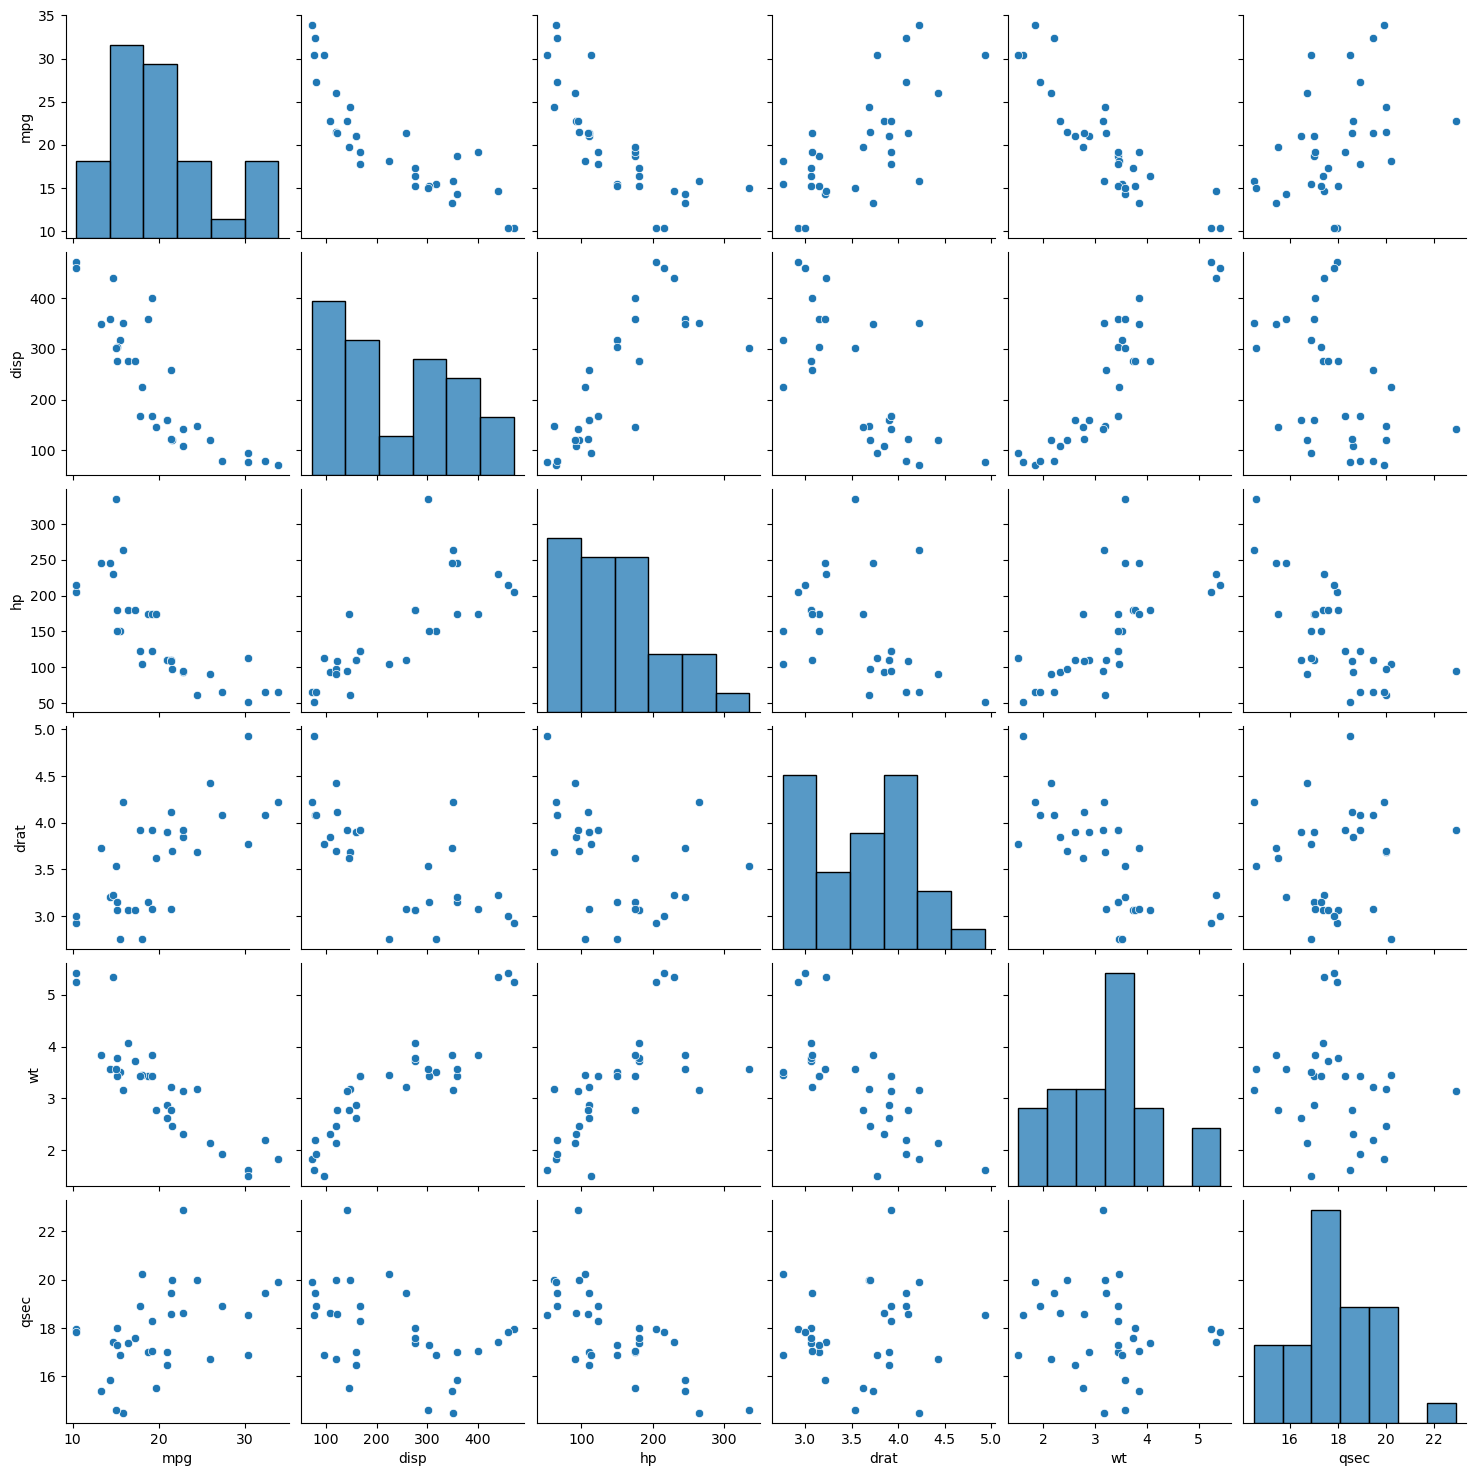

In [153]:
sns.pairplot(mtcars_data)

### Feature selection
Based on the pairplot, we observe that **mpg** has the strongest correlation with **wt** and strong correlations with **drat**, **hp**, and **disp**. Since **hp** and **disp** are highly correlated with each other, we choose **wt**, **hp**, and **drat** as the predictor variables.


In [155]:

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Select relevant features 
X = mtcars_data[['wt', 'hp', 'drat']]  
y = mtcars_data['mpg']  # Target variable (mpg)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for SGD)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the SGDRegressor
sgd_reg = SGDRegressor(max_iter=2000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_train = sgd_reg.predict(X_train_scaled)
y_pred_test = sgd_reg.predict(X_test_scaled)

# Evaluate the model with RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print RMSE
print(f'Training RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')



Training RMSE: 2.807450634883502
Test RMSE: 2.8231753440902523


### Conclusion:
We trained an **SGDRegressor** model with a maximum of 2000 iterations and a tolerance of 1e-3, achieving an RMSE of 2.807 on the training set and 2.823 on the test set. The close values of training and test RMSE suggest that the model generalizes well without overfitting. This indicates that the selected features (scaled **wt**, **hp**, and **drat**) are effective predictors for the target variable **mpg**.



# Part 4:  

Read about Probabilistic Interpretation of Linear Regression -- reference [1] in lecture notes, pages 11-13.